In [165]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib.ticker import MultipleLocator
from scipy import stats, integrate

1\. **Color-coded scatter plot**

Produce a scatter plot from a dataset with two categories.

* Write a function that generates a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and standard deviation. Set different values of the mean and stardand deviation between the two samples.
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below:

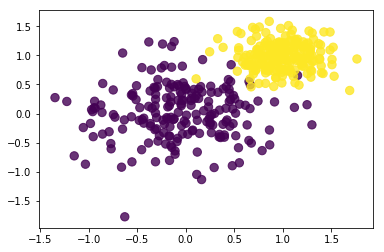

In [2]:
from IPython.display import Image
Image('two_categories_scatter_plot.png')

<ipython-input-34-2ea0227129a3>:2: RuntimeWarning: covariance is not positive-semidefinite.
  data = np.random.multivariate_normal(mean, conv, leng)


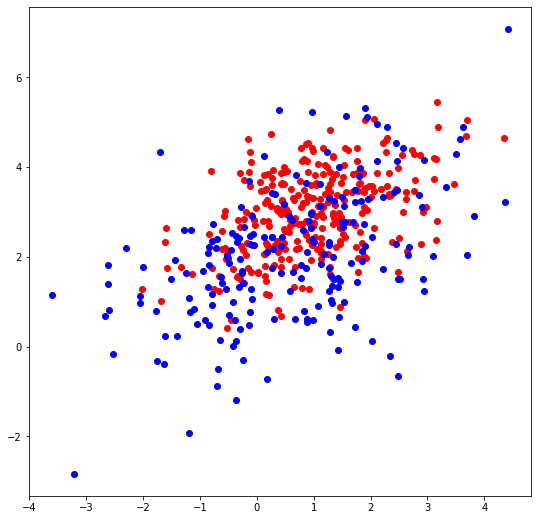

In [34]:
def dataset(mean, conv, leng):    
    data = np.random.multivariate_normal(mean, conv, leng)
    df = pd.DataFrame(data, columns=["x", "y"])
    return df

m1 = [1, 3]
c1 = [(1, .5), (.5, 1)]
m2 = [0.5, 2]
c2 = [(1, 2), (2, 1)]

df1 = dataset(m1,c1, 300)
df2 = dataset(m2, c2, 200)

fig, ax = plt.subplots(figsize=(9, 9))
ax.scatter(x="x", y="y", data=df1, c='r')
ax.scatter(x="x", y="y", data=df2, c='b')

2\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following pickle file:
```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```
* Inspect the dataset, you'll find two variables (features)
* Convert the content to a Pandas Dataframe
* Clean the sample by selecting the entries (rows) with the absolute values of the variable "residual" smaller than 2
* Plot a Seaborn jointplot of "residuals" versus "distances", and use seaborn to display a linear regression. 

Comment on the correlation between these variables.

* Create manually (without using seaborn) the profile histogram for the "distance" variable; choose an appropriate binning.
* Obtain 3 numpy arrays:
  * `x`, the array of bin centers of the profile histogram of the "distance" variable
  * `y`, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * `err_y`, the standard deviation of the of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

In [35]:
!wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/

--2021-12-03 12:03:12--  https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl
Resolving www.dropbox.com (www.dropbox.com)... 162.125.66.18
Connecting to www.dropbox.com (www.dropbox.com)|162.125.66.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/3uqleyc3wyz52tr/residuals_261.pkl [following]
--2021-12-03 12:03:12--  https://www.dropbox.com/s/raw/3uqleyc3wyz52tr/residuals_261.pkl
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc21e25360cdfee878ecab19c704.dl.dropboxusercontent.com/cd/0/inline/BbKtRLUBf1wt9UzemlLUR0dbk62Wali-x0Gj1i6k7HW4jECR-JNGbUrTz69iZYeZ7x5swXcpZ3ouu88P5wqoCtuBi2VHbWGgeFOD4s5cKWaBFSAHz4bBzyGVY6GnKFQR95s9HYptKXNPgM13lW8Hpa_s/file# [following]
--2021-12-03 12:03:13--  https://uc21e25360cdfee878ecab19c704.dl.dropboxusercontent.com/cd/0/inline/BbKtRLUBf1wt9UzemlLUR0dbk62Wali-x0Gj1i6k7HW4jECR-JNGbUrTz69iZYeZ7x5swXcpZ3ouu88P5wqoCtuBi2VHbWGgeFOD4

In [56]:
import pickle

with open('data/residuals_261.pkl', 'rb') as f:
    data = pickle.load(f)

df = pd.DataFrame(data.item())

df

,residuals,distances
0,1.100000,16.0
1,-1.950000,6.3
2,-7.200000,3.4
3,-4.150000,8.4
4,-6.590000,1.7
...,...,...
11126,-0.760000,14.4
11127,0.380000,7.5
11128,0.083333,1.7
11129,0.166667,19.1


In [57]:
df1 = df[abs(df['residuals']) < 2.0]

df1

,residuals,distances
0,1.100000,16.0
1,-1.950000,6.3
8,-0.042857,3.3
9,0.128571,5.3
10,0.085714,15.0
...,...,...
11126,-0.760000,14.4
11127,0.380000,7.5
11128,0.083333,1.7
11129,0.166667,19.1


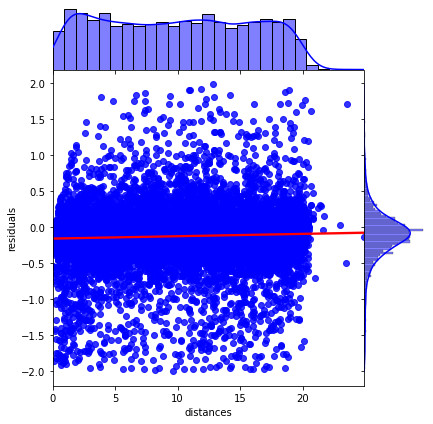

In [67]:
sns.jointplot(x = 'distances', y = 'residuals', data = df1, kind = 'reg', space=0, color="b",  line_kws={"color": "red"})

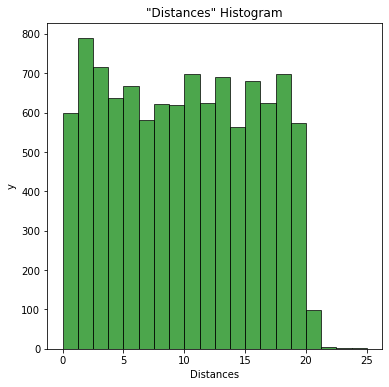

In [73]:
fig, ax = plt.subplots(figsize = (6, 6))
h, bins, _ = plt.hist(df1['distances'], bins = 20, facecolor = "green", alpha = 0.7, range = [0, 25], edgecolor = "black")

ax.set_title('"Distances" Histogram')
ax.set_xlabel('Distances')
ax.set_ylabel('y')
plt.show()

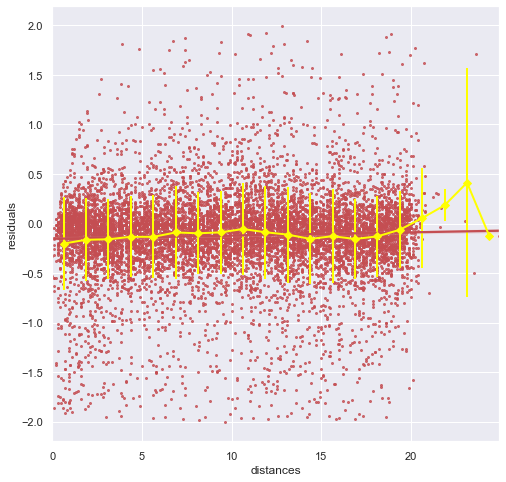

In [92]:
x = []
y = []
err_y = []

for i in range(1,len(bins)):
    a = df1[(df1['distances'] > bins[i-1]) & (df1['distances'] <= bins[i])]['residuals'].mean()
    b = df1[(df1['distances'] > bins[i-1]) & (df1['distances'] <= bins[i])]['residuals'].std()
    x.append((bins[i] + bins[i-1]) /2 )
    y.append(a)
    err_y.append(b)

x = np.array(x)
y = np.array(y)
err_y = np.array(err_y)

fig, _ = plt.subplots()
fig.set_size_inches(8, 8)
ax = sns.regplot(x = "distances", y = "residuals", data = df1, color = "r", scatter_kws={"s": 4})
ax.errorbar(x = x, y = y, yerr = err_y, color = 'yellow', linewidth = 2, marker='D',)
plt.show()

3\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn):

* Fill a numpy array `x` of length N (with $N=\mathcal{O}(100)$) with a variable normally distributed, with a given mean and standard deviation
* Fill an histogram in pyplot taking proper care of the aesthetic:
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* For every element of `x`, create a gaussian with the mean corresponding to the element value and the standard deviation as a parameter that can be tuned. The standard deviation default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with `np.sum()`) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method. Superimpose the normalized sum of all gaussians to the first histogram.


<ipython-input-211-a4c78254a043>:10: RuntimeWarning: divide by zero encountered in true_divide
  error = 1/np.sqrt(h)


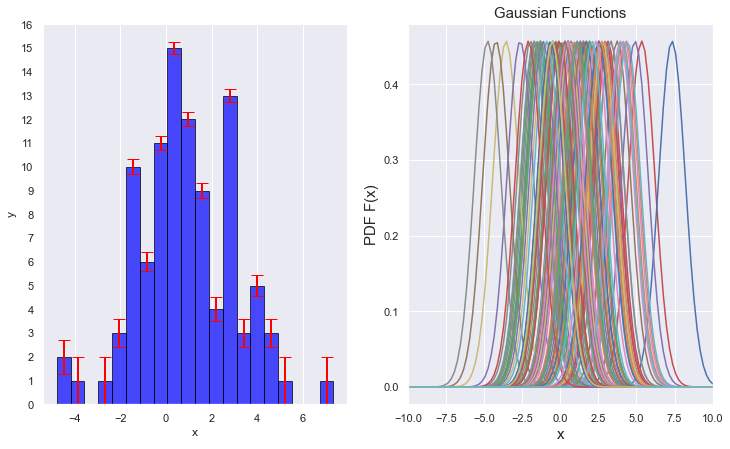

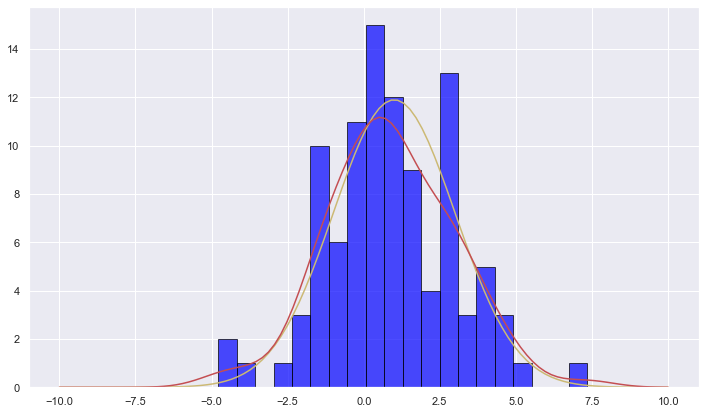

In [211]:
mean = 1
std = 2
N = 100
x = np.random.normal(mean, std, N)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12,7))
h, bins, patches = ax1.hist(x, bins = 20, facecolor = "blue", alpha = 0.7, edgecolor = 'black')

center = (bins[1:] + bins[:-1]) / 2
error = 1/np.sqrt(h)

ax1.errorbar(center, h, error, color='red', linewidth=2, capsize=6, marker = "D", fmt='none')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.yaxis.grid()
ax1.yaxis.set_major_locator(MultipleLocator(1))

stdDev = 1.06 * x.std() * (len(x) ** (1/5*-1))
linSpace = np.linspace(-10, 10, N)

gaussian = np.zeros(N)

for i in x:
    pdf = scipy.stats.norm.pdf(linSpace, i, stdDev )
    gaussian += pdf
    ax2.plot(linSpace, pdf)

ax2.set_title('Gaussian Functions', fontsize = 15)
ax2.set_xlabel("x", fontsize = 15)
ax2.set_ylabel("PDF F(x)", fontsize = 15)
ax2.set_xlim(-10, +10)



# Last Part

fig, ax = plt.subplots(figsize = (12,7))

h, bins, patches = ax.hist(x, bins = 20, facecolor = "blue", alpha = 0.7, edgecolor = 'black')
h_Area = scipy.integrate.trapz(h, center)

orgPdf = scipy.stats.norm.pdf(linSpace, mean, std)
orgIntegral = scipy.integrate.trapz(orgPdf, linSpace)
orgPdf = (orgPdf / orgIntegral) * h_Area 

ax.plot(linSpace, orgPdf, c='y', label = 'PDF')

pdf_sum_integral = scipy.integrate.trapz(gaussian, linSpace)
gaussian = gaussian / pdf_sum_integral * h_Area 

ax.plot(linSpace, gaussian, c='r', label = 'PDF of sum')




